# <font color="purple"><h3 align="center">SBERBANK GOAL 1</h3></font>

## **Exploratory Data Analysis**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn import model_selection, preprocessing
color = sns.color_palette()
%matplotlib inline
# result transform
def num2log(arr):
    return np.log(arr + 1)
# result retransform
def log2num(arr):
    return np.exp(arr) - 1
# treat date
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()

In [51]:
train_df = pd.read_csv("modelingData.csv")
print('In trainset, there are {} rows and {} columns'.format(train_df.shape[0],train_df.shape[1]))
train_df.head()

In trainset, there are 30471 rows and 292 columns


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [52]:
train_df.shape # rows, columns = df.shape

(30471, 292)

In [53]:
#train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [49]:
type(train_df['timestamp'])

pandas.core.series.Series

In [54]:
#train_df['2015-07-01':'2016-05-01']
train_df[(train_df['timestamp'] >= '2013-07-01') & (train_df['timestamp'] <= '2014-05-01')]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
8796,8799,2013-07-01,142,142.0,4.0,6.0,2.0,2013.0,2.0,10.0,...,2,1,0,0,7,0,0,3,2,5680000
8797,8800,2013-07-01,43,28.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,0,0,6,28,0,2,32,7,7050000
8798,8801,2013-07-01,38,38.0,15.0,NaN,NaN,NaN,NaN,NaN,...,6,2,0,5,13,0,1,17,2,5750000
8799,8802,2013-07-01,65,30.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,7,1,0,12,1,5252520
8800,8803,2013-07-01,57,41.0,9.0,NaN,NaN,NaN,NaN,NaN,...,30,1,1,7,38,2,6,85,11,9900000
8801,8804,2013-07-01,37,37.0,23.0,NaN,NaN,NaN,NaN,NaN,...,19,7,2,3,17,0,0,51,3,7195850
8802,8805,2013-07-01,59,32.0,17.0,NaN,NaN,NaN,NaN,NaN,...,7,2,0,9,18,0,2,49,9,9300000
8803,8806,2013-07-01,29,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,4768335
8804,8807,2013-07-01,77,53.0,12.0,NaN,NaN,NaN,NaN,NaN,...,8,2,0,7,15,0,3,51,11,8650000
8805,8808,2013-07-01,29,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,4963218


## <font color='blue'>Rows</font>

In [56]:
train_df.head() # df.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
#df.tail() # df.tail(2)
list(train_df)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [57]:
train_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [58]:
train_df.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

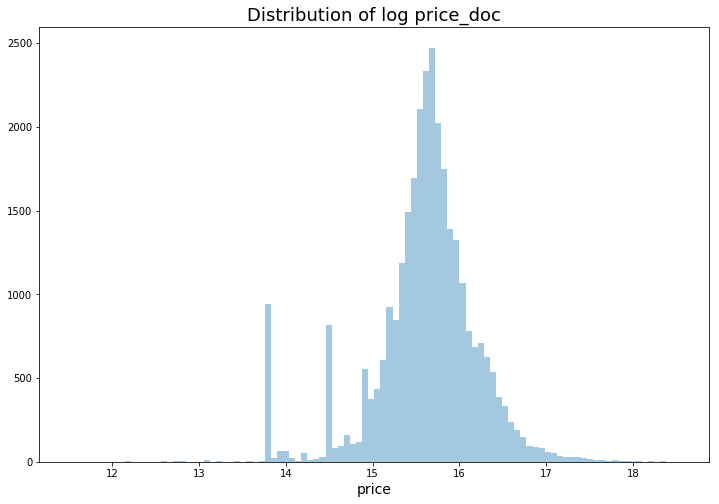

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(num2log(train_df.price_doc.values), bins=100, kde=False)
sns.distplot((train_df.price_doc.values), bins=100, kde=False)
plt.xlabel('price', fontsize=14)
plt.title('Distribution of log price_doc', fontsize = 18)
plt.show()

## <font color='blue'>Columns</font>

In [36]:
train_df['date'] = train_df['timestamp'].apply(trans_date)
train_df['year'] = train_df.date.apply(lambda x: x.year)
train_df['month_num'] = train_df.date.apply(lambda x: x.month + 12*(x.year-2011))
train_df['month'] = train_df.date.apply(lambda x: x.month)
start_date = train_df.date.min()
train_df['diff_date'] = train_df['date'].apply(lambda x: (x - start_date).days)
train_df['log_price'] = num2log(train_df.price_doc.values)

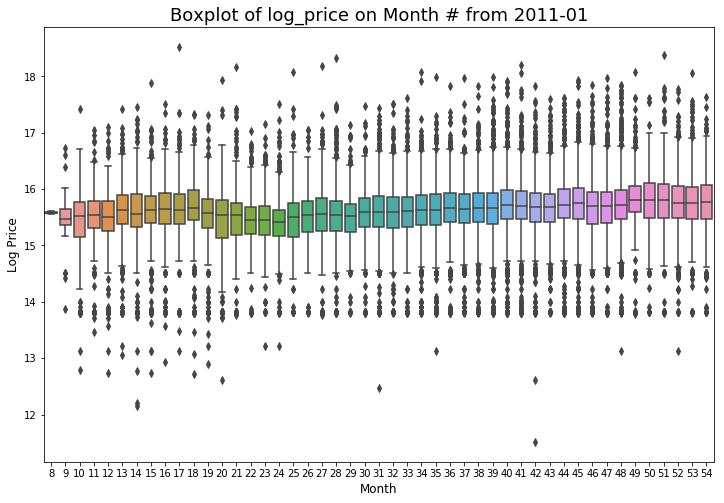

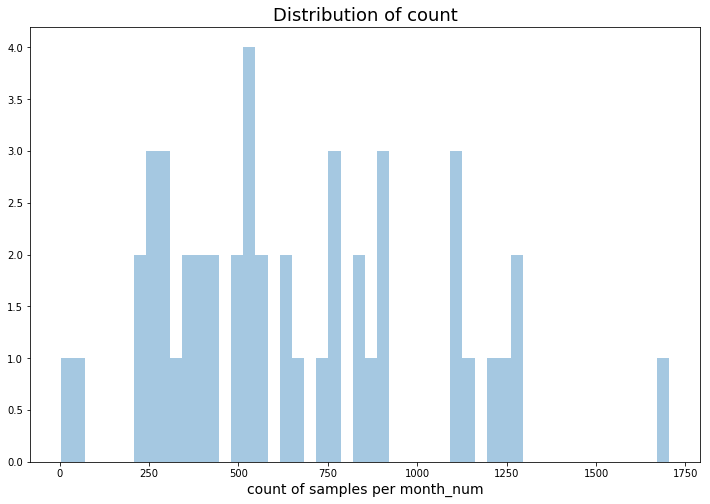

In [37]:
month_num_count = train_df.groupby('month_num').count().reset_index()
month_num_count = train_df.groupby('month_num').size().reset_index()
month_num_count.columns = ['month_num', 'Count']
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month_num', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of log_price on Month # from 2011-01', fontsize = 18)
plt.show()
plt.figure(figsize=(12,8))
sns.distplot(month_num_count.Count.values, bins=50, kde=False)
plt.xlabel('count of samples per month_num', fontsize=14)
plt.title('Distribution of count', fontsize = 18)
plt.show()